In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
#import matplotlib.cm as cm
from matplotlib.colors import ListedColormap


import warnings 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, normalize

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering


from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('Country-data (1).csv')

In [3]:
df=data.copy()

In [4]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
df["country"].nunique()

167

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


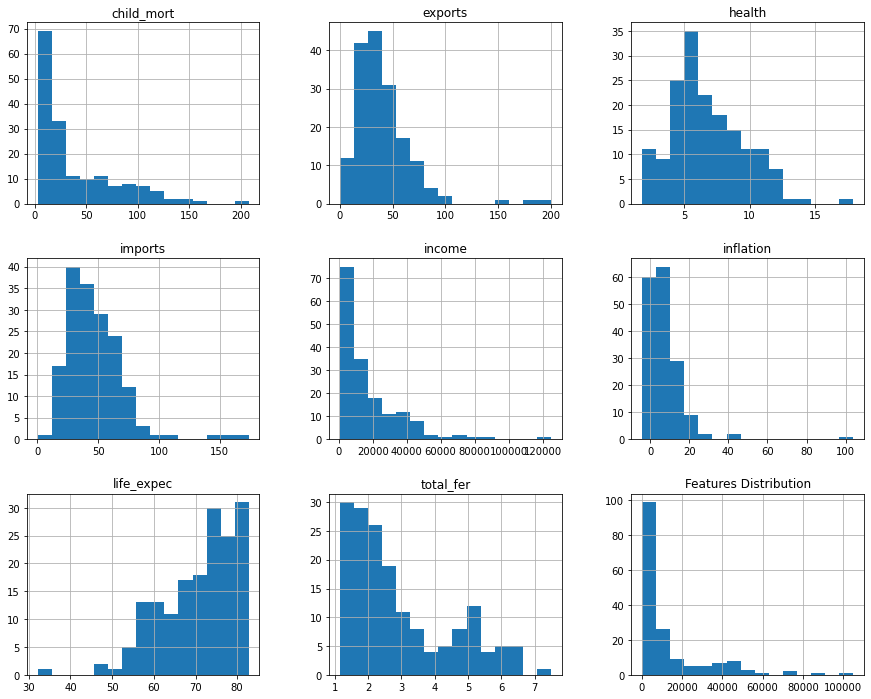

In [8]:
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

In [9]:
df.set_index('country',inplace=True)

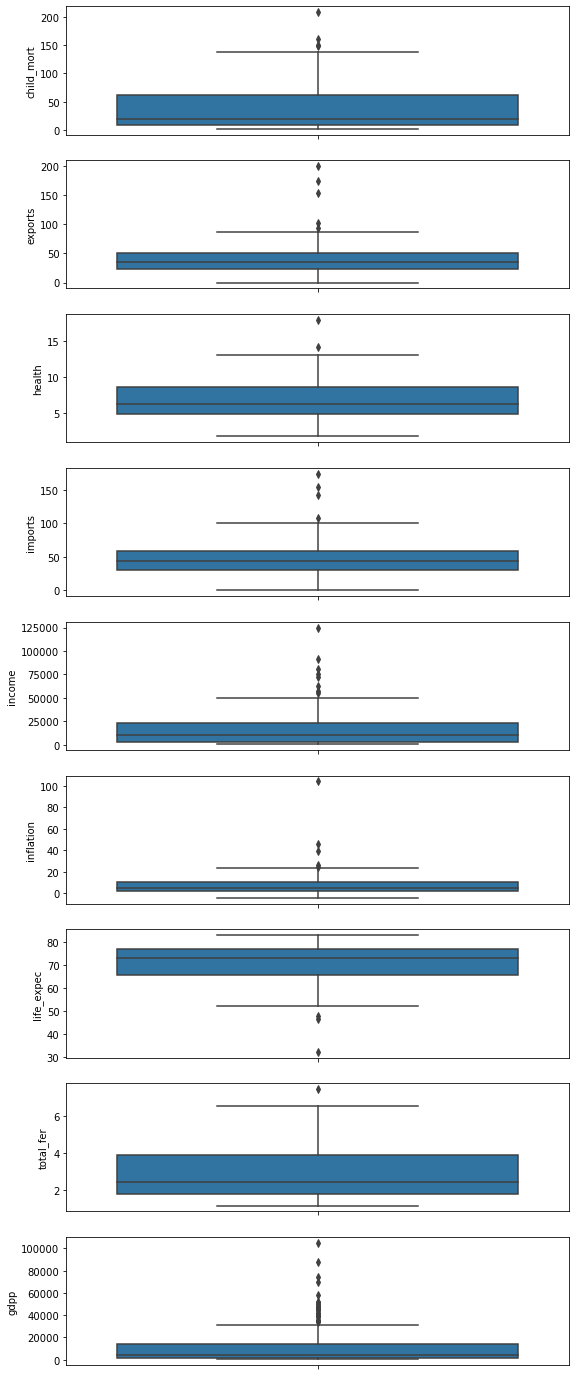

In [11]:
column_names=df.columns
fig,axes=plt.subplots(nrows=len(column_names), figsize=(9,25))
for i in range(len(column_names)):
    sns.boxplot(ax=axes[i],y=column_names[i],data=df)

In [51]:
df_cor = df.drop('country',axis=1).corr()
df_cor

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


# Data Preparation

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df= scaler.fit_transform(df)
df= pd.DataFrame(df, index=data.country, columns=column_names)

print("Scaled Dataset Using StandardScaler")
df.head()

Scaled Dataset Using StandardScaler


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


<AxesSubplot:>

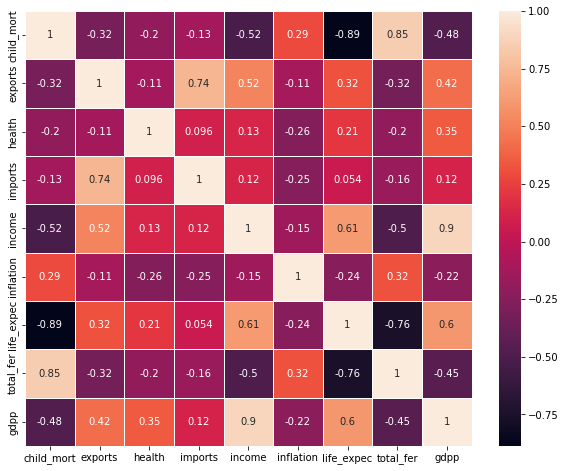

In [13]:
corr=df.corr()
fig, ax=plt.subplots(1,1,figsize=(10,8))
sns.heatmap(corr,annot=True, linewidth=.5, ax=ax)

In [14]:
fig = plt.figure(figsize =(10,5))

<Figure size 720x360 with 0 Axes>

In [15]:
X = df.values
X

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

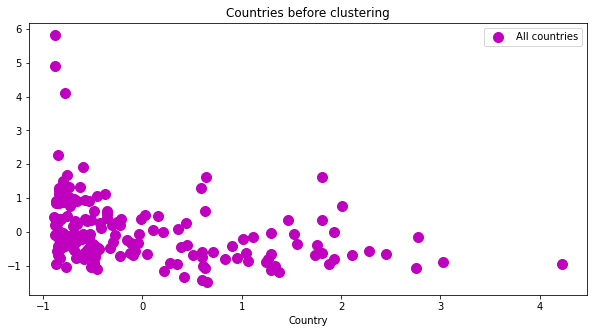

In [16]:
fig = plt.figure(figsize = (10,5))
plt.scatter(X[:,0],X[:,1],s=100,c='m',label='All countries')
plt.title('Countries before clustering')
plt.xlabel('Country')
plt.ylabel('')
plt.legend()
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-p

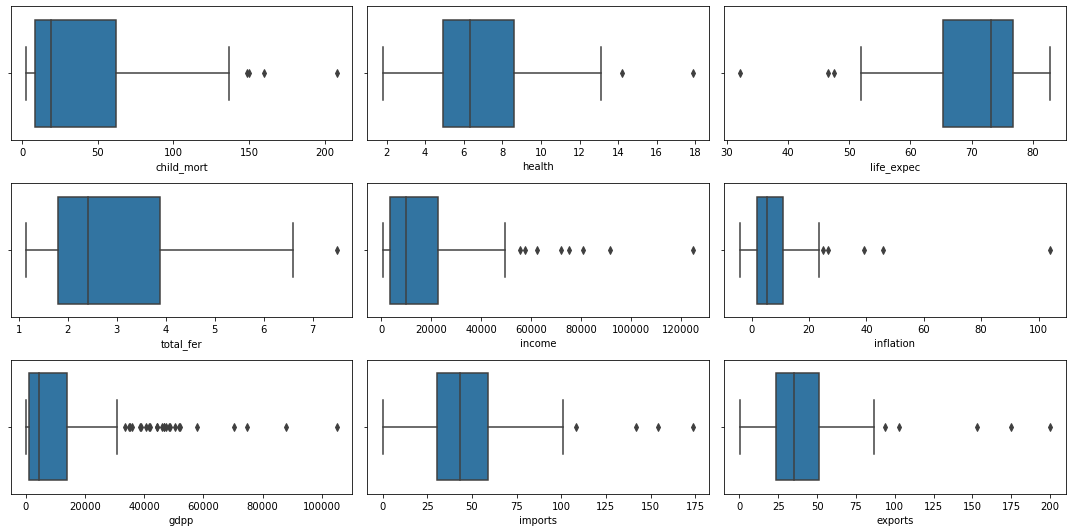

In [17]:
fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(data['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(data['health'], ax = axs[0,1])
plt3 = sns.boxplot(data['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(data['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(data['income'], ax = axs[1,1])
plt6 = sns.boxplot(data['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(data['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(data['imports'], ax = axs[2,1])
plt9 = sns.boxplot(data['exports'], ax = axs[2,2])


plt.tight_layout()

# Modeling

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, random_state= 123).fit(df)


In [22]:
df_final=df.copy()

In [24]:
df_final['K_Means_clusters']=kmeans.labels_

In [25]:
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [26]:
kmeans.cluster_centers_

array([[-0.40645337, -0.03165259, -0.2244709 ,  0.02416161, -0.25177041,
        -0.01716742,  0.25473362, -0.42434279, -0.35448141],
       [ 1.36021776, -0.43753313, -0.15598401, -0.18920377, -0.68689408,
         0.40211078, -1.28217981,  1.36494385, -0.60424243],
       [-0.82744866,  0.64507985,  0.72741122,  0.19063895,  1.48424268,
        -0.48492064,  1.07957853, -0.79187687,  1.61599536]])

In [27]:
df_final[df_final['K_Means_clusters']==2].head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Means_clusters
country,,,,,,,,,,
Australia,-0.832423,-0.779697,0.699011,-1.076779,1.261966,-0.628316,1.290735,-0.674457,2.130699,2
Austria,-0.844858,0.372890,1.527901,0.037693,1.355617,-0.655549,1.121559,-0.999109,1.857082,2
Bahrain,-0.737914,1.038830,-0.673953,0.166126,1.246357,-0.032435,0.614031,-0.522070,0.423331,2
Belgium,-0.839884,1.291301,1.418356,1.152164,1.246357,-0.559999,1.065167,-0.720836,1.720274,2
Brunei,-0.690660,0.961991,-1.451722,-0.782625,3.301480,0.846206,0.738094,-0.734087,1.222291,2


In [28]:
df_final['K_Means_clusters'].replace({0:'Developed',1:'Developing',2:'Underdeveloped'}, inplace=True)
df_final.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Means_clusters
country,,,,,,,,,,
Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,Developing
Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,Developed
Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,Developed
Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,Developing
Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,Developed


In [29]:
df_final.K_Means_clusters.value_counts()

Developed         84
Developing        47
Underdeveloped    36
Name: K_Means_clusters, dtype: int64

In [30]:
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

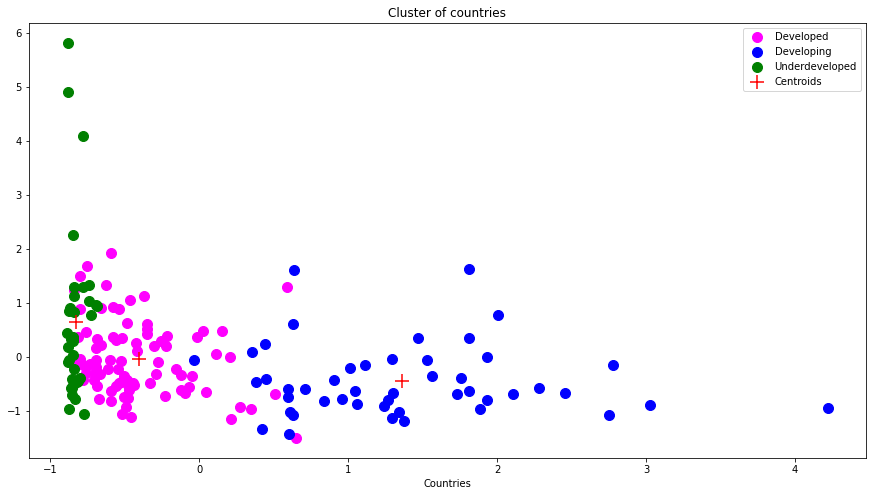

In [32]:
fig = plt.figure(figsize = (15,8))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='magenta',label='Developed')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Developing')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Underdeveloped')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='red',label='Centroids',marker = "+")
plt.title('Cluster of countries')
plt.xlabel('Countries')
plt.ylabel('')
plt.legend()
plt.show()

# Clustering with Hierachial

In [33]:
from sklearn.cluster import AgglomerativeClustering

In [34]:
hc=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit_predict(df)

In [35]:
df_final['Hierarchial_clusters']=hc

In [36]:
df_final[df_final['Hierarchial_clusters']==1].head(3)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Means_clusters,Hierarchial_clusters
country,,,,,,,,,,,
Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,Developed,1
Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,Developed,1
Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,Developing,1


In [37]:
X=df.values
X

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [38]:
df_final.Hierarchial_clusters.value_counts()

1    106
0     34
2     27
Name: Hierarchial_clusters, dtype: int64

# PCA

In [54]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [55]:
df = pd.read_csv('Country-data (1).csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [56]:
X = df.iloc[:, 1:9].values
y = df.iloc[:, 1].values

In [41]:
X.shape

(167, 8)

In [42]:
y.shape

(167,)

In [57]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [59]:
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [60]:
explained_variance

array([0.43637045, 0.20443745])

In [61]:
X_train

array([[ 2.75132143e-01, -6.16497844e-01],
       [ 2.08762735e+00, -9.46491902e-01],
       [ 1.13906576e+00, -2.16332724e-01],
       [-2.93453659e+00,  9.42911120e-01],
       [ 8.77409845e-01,  3.10024189e-01],
       [-6.21270744e-01, -1.74157561e-01],
       [ 1.03414602e+00, -1.07558394e+00],
       [ 1.26401501e+00,  5.74766293e-01],
       [ 1.80756517e+00, -6.37277877e-01],
       [ 5.07462058e-01,  4.89751772e-01],
       [-4.49688613e+00,  2.00942398e+00],
       [-4.65402261e-01,  1.20935647e+00],
       [-2.49247941e+00,  1.32140541e+00],
       [ 1.47697785e+00, -1.64781058e+00],
       [ 1.49629628e-02, -2.22474634e+00],
       [ 1.42979196e-02, -1.37776755e+00],
       [ 1.53893898e+00,  1.37901947e+00],
       [ 1.27210059e+00, -8.79587919e-01],
       [ 1.27197937e+00, -5.06015236e-01],
       [-1.18853141e+00, -7.80177665e-01],
       [-2.63929617e-01,  7.49598662e-01],
       [ 1.60777946e+00,  4.74779024e-01],
       [-1.79589457e+00,  1.06556955e-01],
       [-2.

In [62]:
X_test

array([[-1.82098188,  0.97512945],
       [-2.10936402,  0.29583709],
       [ 2.89994148, -0.10684123],
       [ 1.45168085, -1.93571526],
       [ 1.13340444,  0.17118417],
       [ 1.83865187,  0.75614846],
       [ 1.42015919, -2.05258972],
       [-0.08362027, -1.75106352],
       [ 1.37189132, -0.514017  ],
       [ 2.23629183, -0.06776021],
       [ 1.61582956, -1.97618397],
       [-2.97164743,  0.3981388 ],
       [ 0.57055163, -0.24809729],
       [-0.12656152, -0.01149502],
       [ 3.23046328,  1.48190128],
       [-0.14673582, -0.97883906],
       [ 1.09427424, -1.15772874],
       [-3.4417304 ,  0.77829794],
       [ 1.60895725, -1.95327028],
       [ 1.44585962,  0.74993541],
       [-1.87226476, -1.5965562 ],
       [-2.85185269,  1.0389399 ],
       [-2.4612308 , -0.90210897],
       [-1.81238304,  0.04919575],
       [-1.50302514,  0.4419024 ],
       [-0.56621132, -0.19113809],
       [-2.91225763, -0.20723636],
       [-2.35165576, -0.57499644],
       [-0.23973937,

In [63]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'

In [64]:
pca.fit(X)

PCA(n_components=2)

In [65]:
pca.components_

array([[-0.47287988,  0.30839609,  0.14456816,  0.19464001,  0.38678706,
        -0.22047498,  0.46419134, -0.45695156],
       [ 0.21412406,  0.60837422, -0.24160817,  0.66113128,  0.03120652,
         0.00577075, -0.23734341,  0.17670197]])

In [66]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'